# Clasificador de rese√±as

- **Joan Pedro Bruxola**
- **Julio Garc√≠a Bustos**
- **Marcos Rosique Mart√≠nez**
- **Mario Soto Ramos**

Primero importamos todas las librer√≠as importantes

In [2]:
import numpy as np
import pandas as pd
import requests
import re
import kagglehub
import os
import gc
import json

import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options

from bs4 import BeautifulSoup
import time
from langdetect import detect, LangDetectException
import spacy
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

c:\Users\mario\Proyecto_NLP\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Extracci√≥n de URLs

### URLs de las pel√≠culas

In [35]:
# Par√°metros para la URL (puedes cambiar estos valores din√°micamente)
params = {
    "releaseYearMin": 2015,  # A√±o m√≠nimo
    "releaseYearMax": 2020,  # A√±o m√°ximo
    "page": 1                # N√∫mero de p√°gina
}

n = 24  # N√∫mero de pel√≠culas que queremos obtener

# URL base
url = "https://www.metacritic.com/browse/movie/"

# Realizamos la solicitud GET con los par√°metros
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers, params=params)

# Comprobamos si la solicitud fue exitosa
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Encontramos todos los enlaces a las pel√≠culas
    movie_links_positive = soup.find_all("a", class_="c-finderProductCard_container g-color-gray80 u-grid")
    
    # Lista para almacenar los enlaces
    links_positive = []

    # Extraemos los enlaces de las primeras 24 pel√≠culas y los guardamos en la lista
    for idx, link in enumerate(movie_links_positive[:n]):  # Solo las primeras 24
        href = link.get("href")
        if href:
            full_url = f"https://www.metacritic.com{href}"
            links_positive.append(full_url)  # Guardamos el enlace en la lista
            print(f"Pel√≠cula {idx+1}: {full_url}")
    
    # Opcional: Puedes ver todos los enlaces almacenados
    print("\nLista de enlaces almacenados:")
    print(links_positive)

else:
    print("Error al acceder a la p√°gina.")

Pel√≠cula 1: https://www.metacritic.com/movie/moonlight-2016/
Pel√≠cula 2: https://www.metacritic.com/movie/parasite/
Pel√≠cula 3: https://www.metacritic.com/movie/roma/
Pel√≠cula 4: https://www.metacritic.com/movie/manchester-by-the-sea/
Pel√≠cula 5: https://www.metacritic.com/movie/small-axe-lovers-rock/
Pel√≠cula 6: https://www.metacritic.com/movie/portrait-of-a-lady-on-fire/
Pel√≠cula 7: https://www.metacritic.com/movie/i-am-not-your-negro/
Pel√≠cula 8: https://www.metacritic.com/movie/collective/
Pel√≠cula 9: https://www.metacritic.com/movie/carol/
Pel√≠cula 10: https://www.metacritic.com/movie/amazing-grace-1972/
Pel√≠cula 11: https://www.metacritic.com/movie/dunkirk/
Pel√≠cula 12: https://www.metacritic.com/movie/45-years/
Pel√≠cula 13: https://www.metacritic.com/movie/the-irishman/
Pel√≠cula 14: https://www.metacritic.com/movie/inside-out-2015/
Pel√≠cula 15: https://www.metacritic.com/movie/faces-places/
Pel√≠cula 16: https://www.metacritic.com/movie/call-me-by-your-name/
Pel√≠

In [36]:
# Par√°metros para la URL (puedes cambiar estos valores din√°micamente)
params = {
    "releaseYearMin": 2015,  # A√±o m√≠nimo
    "releaseYearMax": 2020,  # A√±o m√°ximo
    "page": 149                # N√∫mero de p√°gina
}

# URL base
url = "https://www.metacritic.com/browse/movie/"

# Realizamos la solicitud GET con los par√°metros
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers, params=params)

# Comprobamos si la solicitud fue exitosa
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Encontramos todos los enlaces a las pel√≠culas
    movie_links_worst = soup.find_all("a", class_="c-finderProductCard_container g-color-gray80 u-grid")
    
    # Lista para almacenar los enlaces
    links_worst = []

    # Extraemos los enlaces de las primeras 24 pel√≠culas y los guardamos en la lista
    for idx, link in enumerate(movie_links_worst[:n]):  # Solo las primeras 24
        href = link.get("href")
        if href:
            full_url = f"https://www.metacritic.com{href}"
            links_worst.append(full_url)  # Guardamos el enlace en la lista
            print(f"Pel√≠cula {idx+1}: {full_url}")
    
    # Opcional: Puedes ver todos los enlaces almacenados
    print("\nLista de enlaces almacenados:")
    print(links_worst)

else:
    print("Error al acceder a la p√°gina.")

Pel√≠cula 1: https://www.metacritic.com/movie/search-party/
Pel√≠cula 2: https://www.metacritic.com/movie/max-steel/
Pel√≠cula 3: https://www.metacritic.com/movie/enter-the-dangerous-mind/
Pel√≠cula 4: https://www.metacritic.com/movie/home-sweet-hell/
Pel√≠cula 5: https://www.metacritic.com/movie/martyrs/
Pel√≠cula 6: https://www.metacritic.com/movie/the-tax-collector/
Pel√≠cula 7: https://www.metacritic.com/movie/gods-not-dead-2/
Pel√≠cula 8: https://www.metacritic.com/movie/blumhouses-fantasy-island/
Pel√≠cula 9: https://www.metacritic.com/movie/norm-of-the-north/
Pel√≠cula 10: https://www.metacritic.com/movie/a-family-man/
Pel√≠cula 11: https://www.metacritic.com/movie/geostorm/
Pel√≠cula 12: https://www.metacritic.com/movie/dirty-grandpa/
Pel√≠cula 13: https://www.metacritic.com/movie/211/
Pel√≠cula 14: https://www.metacritic.com/movie/the-clapper/
Pel√≠cula 15: https://www.metacritic.com/movie/just-getting-started/
Pel√≠cula 16: https://www.metacritic.com/movie/life-itself-2018/
P

In [37]:
# Par√°metros para la URL (puedes cambiar estos valores din√°micamente)
params = {
    "releaseYearMin": 2015,  # A√±o m√≠nimo
    "releaseYearMax": 2020,  # A√±o m√°ximo
    "page": 90                # N√∫mero de p√°gina
}

# URL base
url = "https://www.metacritic.com/browse/movie/"

# Realizamos la solicitud GET con los par√°metros
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers, params=params)

# Comprobamos si la solicitud fue exitosa
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Encontramos todos los enlaces a las pel√≠culas
    movie_links_neutral = soup.find_all("a", class_="c-finderProductCard_container g-color-gray80 u-grid")
    
    # Lista para almacenar los enlaces
    links_neutral = []

    # Extraemos los enlaces de las primeras 24 pel√≠culas y los guardamos en la lista
    for idx, link in enumerate(movie_links_neutral[:n]):  # Solo las primeras 24
        href = link.get("href")
        if href:
            full_url = f"https://www.metacritic.com{href}"
            links_neutral.append(full_url)  # Guardamos el enlace en la lista
            print(f"Pel√≠cula {idx+1}: {full_url}")
    
    # Opcional: Puedes ver todos los enlaces almacenados
    print("\nLista de enlaces almacenados:")
    print(links_neutral)

else:
    print("Error al acceder a la p√°gina.")

Pel√≠cula 1: https://www.metacritic.com/movie/little-monsters/
Pel√≠cula 2: https://www.metacritic.com/movie/between-two-ferns-the-movie/
Pel√≠cula 3: https://www.metacritic.com/movie/all-is-true/
Pel√≠cula 4: https://www.metacritic.com/movie/amnesia-2015/
Pel√≠cula 5: https://www.metacritic.com/movie/judy-punch/
Pel√≠cula 6: https://www.metacritic.com/movie/champs/
Pel√≠cula 7: https://www.metacritic.com/movie/crooked-house/
Pel√≠cula 8: https://www.metacritic.com/movie/ottolenghi-and-the-cakes-of-versailles/
Pel√≠cula 9: https://www.metacritic.com/movie/doctor-sleep/
Pel√≠cula 10: https://www.metacritic.com/movie/the-boy-downstairs/
Pel√≠cula 11: https://www.metacritic.com/movie/the-rachel-divide/
Pel√≠cula 12: https://www.metacritic.com/movie/extraordinary-tales/
Pel√≠cula 13: https://www.metacritic.com/movie/sing/
Pel√≠cula 14: https://www.metacritic.com/movie/lizzie/
Pel√≠cula 15: https://www.metacritic.com/movie/the-lovebirds/
Pel√≠cula 16: https://www.metacritic.com/movie/on-the

### URLs de las rese√±as 

In [38]:
# Definir los filtros y las listas
filters = ['Positive%20Reviews', 'Mixed%20Reviews', 'Negative%20Reviews']
link_lists = [links_positive, links_neutral, links_worst]

# Lista para almacenar los enlaces
review_links = []

# Iterar sobre los filtros y las listas de enlaces
for filter_type in filters:
    for link_list in link_lists:
        review_links += [f"{url}user-reviews/?filter={filter_type}" for url in link_list]

# Ahora review_links contiene todas las URLs concatenadas
print(review_links)
print(f"Tama√±o de review_links: {len(review_links)}")

['https://www.metacritic.com/movie/moonlight-2016/user-reviews/?filter=Positive%20Reviews', 'https://www.metacritic.com/movie/parasite/user-reviews/?filter=Positive%20Reviews', 'https://www.metacritic.com/movie/roma/user-reviews/?filter=Positive%20Reviews', 'https://www.metacritic.com/movie/manchester-by-the-sea/user-reviews/?filter=Positive%20Reviews', 'https://www.metacritic.com/movie/small-axe-lovers-rock/user-reviews/?filter=Positive%20Reviews', 'https://www.metacritic.com/movie/portrait-of-a-lady-on-fire/user-reviews/?filter=Positive%20Reviews', 'https://www.metacritic.com/movie/i-am-not-your-negro/user-reviews/?filter=Positive%20Reviews', 'https://www.metacritic.com/movie/collective/user-reviews/?filter=Positive%20Reviews', 'https://www.metacritic.com/movie/carol/user-reviews/?filter=Positive%20Reviews', 'https://www.metacritic.com/movie/amazing-grace-1972/user-reviews/?filter=Positive%20Reviews', 'https://www.metacritic.com/movie/dunkirk/user-reviews/?filter=Positive%20Reviews',

## Extracci√≥n y almacenamiento de rese√±as

In [39]:
# N√∫mero de rese√±as por pel√≠cula
n_res = 20

In [40]:
def get_user_reviews_selenium(movie_url, max_pages=1):  # Cambi√© max_pages a 1 para limitar la cantidad de p√°ginas
    chrome_options = Options()
    #chrome_options.add_argument("--headless")  # Ejecutar sin abrir ventana
    chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("user-agent=Mozilla/5.0")

    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

    all_reviews = []

    for page in range(max_pages):  # Solo una p√°gina por URL
        url = f"{movie_url}&page={page + 1}"  # Se a√±ade la p√°gina actual a la URL
        driver.get(url)
        time.sleep(2)  # Espera a que cargue JavaScript

        soup = BeautifulSoup(driver.page_source, "html.parser")

        review_containers = soup.find_all("div", attrs={"data-testid": "product-review"})

        for container in review_containers:
            score_tag = container.find("div", class_="c-siteReviewScore")
            score = score_tag.get_text(strip=True) if score_tag else "No score"

            user_tag = container.find("a", class_="c-siteReviewHeader_username")
            username = user_tag.get_text(strip=True) if user_tag else "No username"

            date_tag = container.find("div", class_="c-siteReviewHeader_reviewDate")
            date = date_tag.get_text(strip=True) if date_tag else "No date"

            quote_tag = container.find("div", class_="c-siteReview_quote")
            review_text = quote_tag.get_text(strip=True) if quote_tag else "No review text"

            all_reviews.append({
                "movie_url": movie_url,  # A√±adimos la URL de la pel√≠cula
                "username": username,
                "date": date,
                "score": score,
                "review": review_text
            })

        if len(all_reviews) >= n_res:  # Si ya tenemos 20 rese√±as, salimos del bucle
            break

    driver.quit()
    return all_reviews


# Lista para almacenar todas las rese√±as
all_reviews_data = []

# Extraer 10 rese√±as para cada enlace en review_links
for movie_url in review_links:
    print(f"Extrayendo rese√±as de: {movie_url}")
    reviews = get_user_reviews_selenium(movie_url)

    # Almacenar las rese√±as en la lista
    for review in reviews[:n_res]:  # Almacenamos solo las primeras 10 rese√±as
        all_reviews_data.append(review)

# Convertir la lista de rese√±as a un DataFrame de pandas
df_reviews = pd.DataFrame(all_reviews_data)

# Mostrar las primeras filas del DataFrame
print(df_reviews.head())

Extrayendo rese√±as de: https://www.metacritic.com/movie/moonlight-2016/user-reviews/?filter=Positive%20Reviews


KeyboardInterrupt: 

In [41]:
# Guardar el DataFrame en un archivo CSV
df_reviews.to_csv("reviews_finales.csv", index=True)

NameError: name 'df_reviews' is not defined

## Preprocesamiento

In [4]:
# Leer el archivo CSV y establecer la columna 'Unnamed: 0' como √≠ndice
df = pd.read_csv("reviews_finales.csv")

In [5]:
df.head()

movie_url        username  \
0  https://www.metacritic.com/movie/moonlight-201...  Randomsquirrel   
1  https://www.metacritic.com/movie/moonlight-201...  isabellacosta8   
2  https://www.metacritic.com/movie/moonlight-201...     Gabrielx593   
3  https://www.metacritic.com/movie/moonlight-201...            NWR1   
4  https://www.metacritic.com/movie/moonlight-201...    Alexmarshall   

           date  score                                             review  
0  Jan 15, 2025     10  It was an absolutely brilliant film. Character...  
1  Oct 10, 2024     10    [SPOILER ALERT: This review contains spoilers.]  
2   Oct 9, 2024     10    [SPOILER ALERT: This review contains spoilers.]  
3  Mar 31, 2024      9  I haven‚Äôt felt this much emotion in a long tim...  
4  Oct 16, 2023     10                                      Reallyamazing

In [6]:
df.shape

(1814, 5)

In [7]:
# Aplicar la extracci√≥n y transformaci√≥n del nombre de la pel√≠cula a la columna "movie_url"
df['movie_url'] = df['movie_url'].apply(lambda x: re.search(r'/movie/([^/]+)', x).group(1).replace('-', ' ').title())

# Renombrar la columna "movie_url" a "movie"
df = df.rename(columns={"movie_url": "movie"})

df.head(5)

movie        username          date  score  \
0  Moonlight 2016  Randomsquirrel  Jan 15, 2025     10   
1  Moonlight 2016  isabellacosta8  Oct 10, 2024     10   
2  Moonlight 2016     Gabrielx593   Oct 9, 2024     10   
3  Moonlight 2016            NWR1  Mar 31, 2024      9   
4  Moonlight 2016    Alexmarshall  Oct 16, 2023     10   

                                              review  
0  It was an absolutely brilliant film. Character...  
1    [SPOILER ALERT: This review contains spoilers.]  
2    [SPOILER ALERT: This review contains spoilers.]  
3  I haven‚Äôt felt this much emotion in a long tim...  
4                                      Reallyamazing

In [8]:
# Funci√≥n para manejar excepciones y textos vac√≠os
def safe_detect(text):
    try:
        if text.strip():  # Asegurarse de que el texto no est√© vac√≠o
            return detect(text)
        else:
            return None  # Si el texto est√° vac√≠o, devuelve None
    except LangDetectException:
        return None  # Si no puede detectar el idioma, devuelve None

# Eliminar las filas donde la columna 'review' contiene "SPOILER ALERT" y crear la columna 'sentiment' basada en la columna 'score'
df = (df[~df['review'].str.contains("SPOILER ALERT", case=True, na=False)]
              .assign(language = df['review'].apply(safe_detect)))

# Filtrar el DataFrame para quedarse solo con las filas donde el idioma es 'en'
df = df[df['language'] == 'en']

df = df.drop('language', axis = 1)

df.head(5)

movie        username          date  score  \
0  Moonlight 2016  Randomsquirrel  Jan 15, 2025     10   
3  Moonlight 2016            NWR1  Mar 31, 2024      9   
5  Moonlight 2016        Youngoth  Oct 16, 2023     10   
6  Moonlight 2016       Dominik08  Aug 15, 2023      8   
7  Moonlight 2016        AgentLvi  Jun 27, 2023      7   

                                              review  
0  It was an absolutely brilliant film. Character...  
3  I haven‚Äôt felt this much emotion in a long tim...  
5  This movie is masterpiece, so well done. Deser...  
6  A refined production, with no obvious weakness...  
7  Decent movie. The story is so --so, scoring is...

In [9]:
df['sentiment'] = df['score'].apply(lambda x: 'NEG' if x <= 3 else ('NEU' if 4 <= x <= 6 else 'POS'))

df.head(5)

movie        username          date  score  \
0  Moonlight 2016  Randomsquirrel  Jan 15, 2025     10   
3  Moonlight 2016            NWR1  Mar 31, 2024      9   
5  Moonlight 2016        Youngoth  Oct 16, 2023     10   
6  Moonlight 2016       Dominik08  Aug 15, 2023      8   
7  Moonlight 2016        AgentLvi  Jun 27, 2023      7   

                                              review sentiment  
0  It was an absolutely brilliant film. Character...       POS  
3  I haven‚Äôt felt this much emotion in a long tim...       POS  
5  This movie is masterpiece, so well done. Deser...       POS  
6  A refined production, with no obvious weakness...       POS  
7  Decent movie. The story is so --so, scoring is...       POS

In [10]:
df.shape

(1548, 6)

Instalaci√≥n del modelo de spaCy

Para instalar el modelo `en_core_web_md` de **spaCy**, ejecuta el siguiente comando en tu **Anaconda Prompt** o **Terminal**:

```bash
python -m spacy download en_core_web_md


In [11]:
nlp = spacy.load('en_core_web_md')

In [12]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

{'very', 'again', 'rather', 'not', 'than', 'something', 'with', 'he', 'some', 'serious', 'almost', 'under', 'thus', 'this', 'ours', 'done', 'amount', 'they', 'why', 'too', 'using', 'am', 'say', 'name', 'those', 'yourselves', 'below', 'any', 'besides', 'yet', 'n‚Äôt', 'n‚Äòt', 'off', 'themselves', 'third', 'other', 'seeming', 'among', 'yours', 'therein', 'further', 'elsewhere', 'itself', 'up', "'d", 'amongst', 'her', 'along', 'twenty', 'been', 'but', 'his', 'forty', 'whereas', 'toward', 'whole', 'move', 'across', 'indeed', 'without', 'beside', 'nor', 'except', 'much', 'until', 'towards', 'whereupon', 'due', 'eight', 'enough', 'hereafter', 'often', 'anyway', 'thereupon', 'whom', 'several', 'upon', 'nothing', 'these', 'hundred', 'afterwards', 'front', 'hence', 'ourselves', 'thru', 'both', '‚Äòre', 'where', 'first', 'twelve', '‚Äôve', 'being', 'never', 'from', 'become', 'fifteen', 'the', 'is', 'whatever', 'together', 'hereupon', 'formerly', 'latterly', 'own', 'really', 'or', 'for', 'can', 

Podemos calcular un porcentaje de stopwords para cada clase, para ver directamente la influencia de ellos en el texto. 

In [13]:
# funci√≥n para calcular el porcentaje de stopwords en un texto
def stopword_percentage(tokens):
    stopword_count = sum(1 for word in tokens if word in STOP_WORDS)
    stopword_pct = (stopword_count / len(tokens)) * 100
    return stopword_pct

# Funci√≥n para limpiar, tokenizar y lematizar
def process_text_column2(df, text_column):

    df['stopword_percentage'] = df[text_column].apply(stopword_percentage)
    return df

def graphics_stopwords(df, text_column):

    stopwords_by_rating = df.groupby(text_column)['stopword_percentage'].mean()
    meaningful_by_rating = 100 - stopwords_by_rating

    plt.figure(figsize=(8, 6))
    bar1 = plt.bar(stopwords_by_rating.index, stopwords_by_rating, color='#2C77A8', label='Stopwords')
    bar2 = plt.bar(meaningful_by_rating.index, meaningful_by_rating, bottom=stopwords_by_rating, color='#87CEEB', label='Palabras con significado')

    plt.xlabel(text_column)
    plt.ylabel('Porcentaje')
    plt.title('Porcentaje de stopwords vs. con significado')
    plt.xticks(stopwords_by_rating.index)
    plt.legend()
    plt.show()

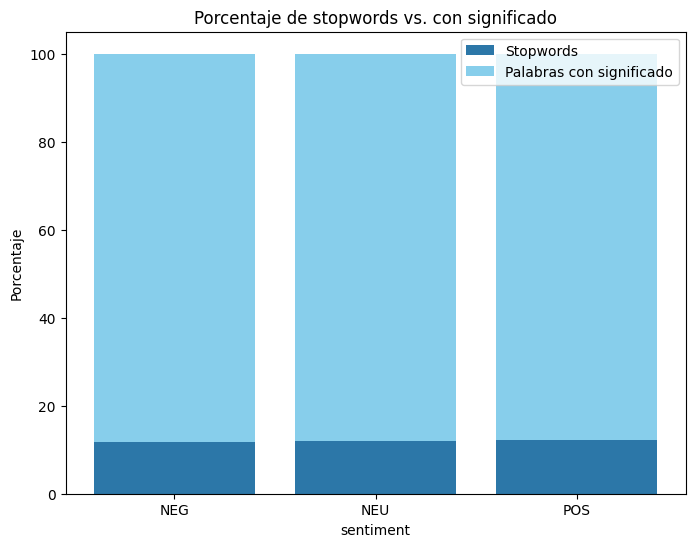

In [14]:
process_text_column2(df, 'review')
graphics_stopwords(df, 'sentiment')

Podemos ver como el porcentaje de stopwords es de alrededor del 15%

In [15]:
# Definir el patr√≥n para los caracteres especiales
pat = '[{}]'.format(re.escape(string.punctuation))

# Definir la funci√≥n para normalizar, lematizar y eliminar puntuaci√≥n
def normalize_document_remove_punct(doc):

    doc = re.sub(r'\d+', '', doc)
    # Separamos en tokens
    tokens = nlp(doc)
    
    # Quitamos puntuaci√≥n, espacios y stopwords, y aplicamos lematizaci√≥n
    filtered_tokens = [re.sub(pat, ' ', t.lemma_.lower())  # Usamos t.lemma_ para lematizar
                       for t in tokens
                       if not t.is_stop        # Eliminar stopwords
                       and not t.is_punct      # Eliminar puntuaci√≥n
                       and not t.is_space]      # Eliminar espacios]     
    
    # Juntamos de nuevo en una cadena
    doc = ' '.join(filtered_tokens)
    
    return doc

# Aplicar la funci√≥n a cada elemento de la columna 'contenido' tanto en treino como en test
df['review'] = df['review'].apply(normalize_document_remove_punct)

df.head(5)

movie        username          date  score  \
0  Moonlight 2016  Randomsquirrel  Jan 15, 2025     10   
3  Moonlight 2016            NWR1  Mar 31, 2024      9   
5  Moonlight 2016        Youngoth  Oct 16, 2023     10   
6  Moonlight 2016       Dominik08  Aug 15, 2023      8   
7  Moonlight 2016        AgentLvi  Jun 27, 2023      7   

                                              review sentiment  \
0  absolutely brilliant film character deep plot ...       POS   
3  feel emotion long time chiron manifest emotion...       POS   
5                    movie masterpiece deserve oscar       POS   
6  refined production obvious weakness base ratio...       POS   
7  decent movie story   so scoring great visual d...       POS   

   stopword_percentage  
0            16.875000  
3            12.867647  
5            10.294118  
6            13.333333  
7            13.131313

## Exploratorio

Aplicamos una tokenizaci√≥n a los datos, para separar las palabras que tenemos en tokens para poder estudiarlo de manera clara y concisa. 

In [16]:
def process_text_column(df, text_column, lemmatizer=None):
    df['tokens'] = df[text_column].apply(nlp)
    return df

In [17]:
process_text_column(df, "review")

movie         username          date  score  \
0       Moonlight 2016   Randomsquirrel  Jan 15, 2025     10   
3       Moonlight 2016             NWR1  Mar 31, 2024      9   
5       Moonlight 2016         Youngoth  Oct 16, 2023     10   
6       Moonlight 2016        Dominik08  Aug 15, 2023      8   
7       Moonlight 2016         AgentLvi  Jun 27, 2023      7   
...                ...              ...           ...    ...   
1809  The Ridiculous 6       ultraviper  Dec 17, 2015      0   
1810  The Ridiculous 6       JackKasket  Dec 15, 2015      0   
1811  The Ridiculous 6       PicaloJack  Dec 15, 2015      1   
1812  The Ridiculous 6        Prosmooth  Dec 15, 2015      0   
1813  The Ridiculous 6  NickLikesMovies  Dec 15, 2015      0   

                                                 review sentiment  \
0     absolutely brilliant film character deep plot ...       POS   
3     feel emotion long time chiron manifest emotion...       POS   
5                       movie masterpiece deserve oscar       POS   
6     refined production obvious weakness base ratio...       POS   
7     decent movie story   so scoring great visual d...       POS   
...                                                 ...       ...   
1809  watch half hour smirk call comedy hour half fu...       NEG   
1810  movie bad review character long review charact...       NEG   
1811  good movie end dog guess sandler write scene d...       NEG   
1812  adam sandler strip citizenship deport year ago...       NEG   
1813  ridiculous lazy attempt comedy see excruciatin...       NEG   

      stopword_percentage                                             tokens  
0               16.875000  (absolutely, brilliant, film, character, deep,...  
3               12.867647  (feel, emotion, long, time, chiron, manifest, ...  
5               10.294118               (movie, masterpiece, deserve, oscar)  
6               13.333333  (refined, production, obvious, weakness, base,...  
7               13.131313  (decent, movie, story,   , so, scoring, great,...  
...                   ...                                                ...  
1809            10.824742  (watch, half, hour, smirk, call, comedy, hour,...  
1810            10.000000  (movie, bad, review, character, long, review, ...  
1811            10.221465  (good, movie, end, dog, guess, sandler, write,...  
1812            15.315315  (adam, sandler, strip, citizenship, deport, ye...  
1813            13.664596  (ridiculous, lazy, attempt, comedy, see, excru...  

[1548 rows x 8 columns]

Podemos graficar la distribuci√≥n de longitud de textos para cada clase.

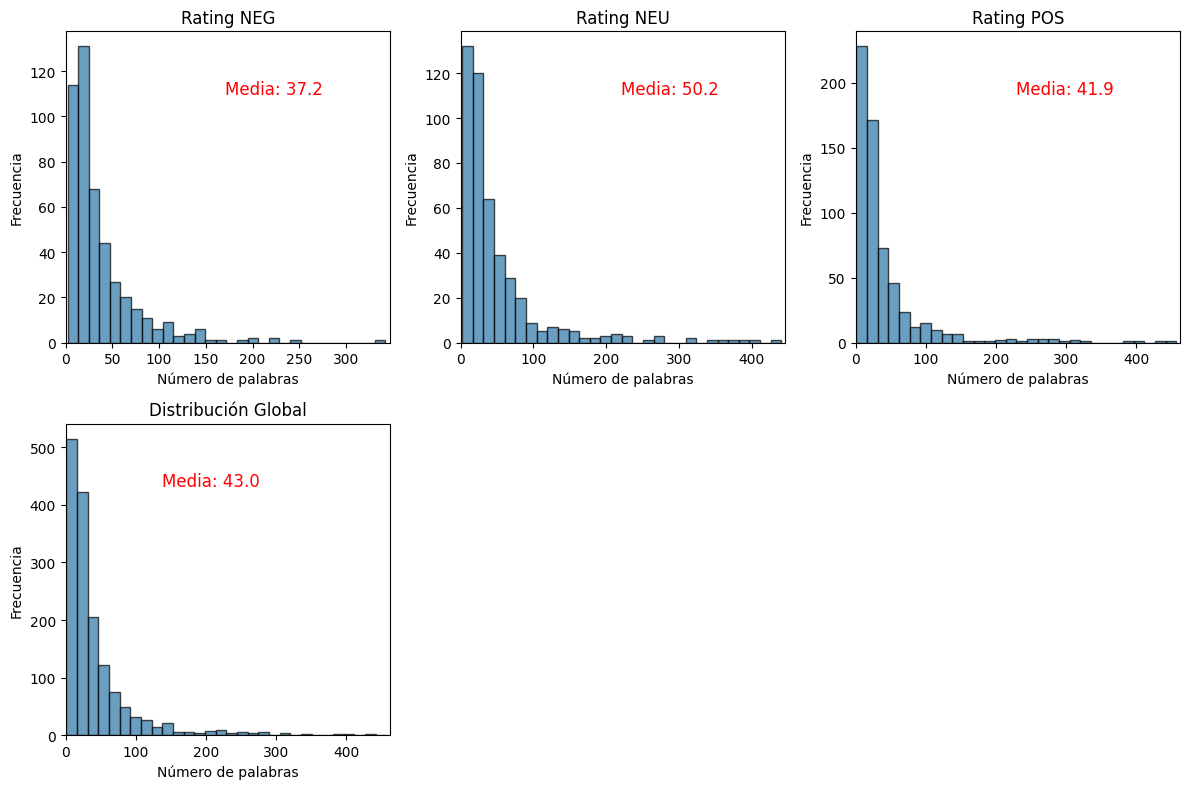

In [18]:
def graficar_longitud_textos(df, text_column, rating_column):
    df['NP'] = df[text_column].apply(len)

    ratings = sorted(df[rating_column].unique())
    num_ratings = len(ratings)
    num_cols = min(3, num_ratings + 1)
    num_rows = (num_ratings + 1 + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))
    axes = np.ravel(axes)

    for i, rating in enumerate(ratings):
        ax = axes[i]
        subset = df[df[rating_column] == rating]
        media_np = subset['NP'].mean()
        max_np = subset['NP'].max()

        ax.hist(subset['NP'], bins=30, edgecolor='black', alpha=0.7, color='#2C77A8')
        ax.set_xlim(0, max_np + 5)  # A√±adimos un margen para mejor visualizaci√≥n
        ax.set_xlabel('N√∫mero de palabras')
        ax.set_ylabel('Frecuencia')
        ax.set_title(f'Rating {rating}')

        ax.text(max_np * 0.5, ax.get_ylim()[1] * 0.8, f'Media: {media_np:.1f}', fontsize=12, color='red')

    # Gr√°fico global al final
    global_ax = axes[num_ratings]
    media_global = df['NP'].mean()
    max_np_global = df['NP'].max()

    global_ax.hist(df['NP'], bins=30, edgecolor='black', alpha=0.7, color='#2C77A8')
    global_ax.set_xlim(0, max_np_global + 5)
    global_ax.set_xlabel('N√∫mero de palabras')
    global_ax.set_ylabel('Frecuencia')
    global_ax.set_title('Distribuci√≥n Global')
    global_ax.text(max_np_global * 0.3, global_ax.get_ylim()[1] * 0.8, f'Media: {media_global:.1f}', fontsize=12, color='red')

    # Eliminar subplots vac√≠os si hay
    for j in range(num_ratings + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

graficar_longitud_textos(df, 'tokens', 'sentiment')

Vemos como la mayor√≠a de los textos tienen una longitud parecida para cada clase, la cu√°l refiere a unas 30-40 palabras por cada rese√±a, lo cu√°l nos va a ayudar a saber como se van a aplicar los word embeddings y los distintos modelos a los datos

Pasamos a eliminar las stopwords para seguir con la otra parte del an√°lisis. 

In [ ]:
df_copy = df.copy()

def eliminar_stopwords(df, column_name):
    # Aplicar eliminaci√≥n de stopwords a la columna especificada
    df[column_name] = df[column_name].apply(lambda tokens: [word for word in tokens if word not in STOP_WORDS])
    return df

In [21]:
eliminar_stopwords(df_copy, 'tokens')

movie         username          date  score  \
0       Moonlight 2016   Randomsquirrel  Jan 15, 2025     10   
3       Moonlight 2016             NWR1  Mar 31, 2024      9   
5       Moonlight 2016         Youngoth  Oct 16, 2023     10   
6       Moonlight 2016        Dominik08  Aug 15, 2023      8   
7       Moonlight 2016         AgentLvi  Jun 27, 2023      7   
...                ...              ...           ...    ...   
1809  The Ridiculous 6       ultraviper  Dec 17, 2015      0   
1810  The Ridiculous 6       JackKasket  Dec 15, 2015      0   
1811  The Ridiculous 6       PicaloJack  Dec 15, 2015      1   
1812  The Ridiculous 6        Prosmooth  Dec 15, 2015      0   
1813  The Ridiculous 6  NickLikesMovies  Dec 15, 2015      0   

                                                 review sentiment  \
0     absolutely brilliant film character deep plot ...       POS   
3     feel emotion long time chiron manifest emotion...       POS   
5                       movie masterpiece deserve oscar       POS   
6     refined production obvious weakness base ratio...       POS   
7     decent movie story   so scoring great visual d...       POS   
...                                                 ...       ...   
1809  watch half hour smirk call comedy hour half fu...       NEG   
1810  movie bad review character long review charact...       NEG   
1811  good movie end dog guess sandler write scene d...       NEG   
1812  adam sandler strip citizenship deport year ago...       NEG   
1813  ridiculous lazy attempt comedy see excruciatin...       NEG   

      stopword_percentage                                             tokens  \
0               16.875000  [absolutely, brilliant, film, character, deep,...   
3               12.867647  [feel, emotion, long, time, chiron, manifest, ...   
5               10.294118               [movie, masterpiece, deserve, oscar]   
6               13.333333  [refined, production, obvious, weakness, base,...   
7               13.131313  [decent, movie, story,   , so, scoring, great,...   
...                   ...                                                ...   
1809            10.824742  [watch, half, hour, smirk, call, comedy, hour,...   
1810            10.000000  [movie, bad, review, character, long, review, ...   
1811            10.221465  [good, movie, end, dog, guess, sandler, write,...   
1812            15.315315  [adam, sandler, strip, citizenship, deport, ye...   
1813            13.664596  [ridiculous, lazy, attempt, comedy, see, excru...   

      NP  
0     13  
3     24  
5      4  
6      7  
7     11  
...   ..  
1809  12  
1810  11  
1811  43  
1812  18  
1813  12  

[1548 rows x 9 columns]

Para ver las palabras m√°s repetidas por vcada clase obtenemos los wordclouds

In [22]:
def wordclouds(df, column_partition, top_n):

    # Obtener lista de todas las palabras en el dataset
    all_words = [word for tokens in df['tokens'] for word in tokens]

    # Contar frecuencia de palabras
    word_freq = Counter(all_words)

    # Obtener las `top_n` palabras m√°s comunes
    top_words = {word for word, _ in word_freq.most_common(top_n)}

    # Filtrar los tokens eliminando las palabras m√°s comunes
    df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in top_words])

    # Generar WordCloud por cada rating
    ratings = sorted(df[column_partition].unique())
    fig, axes = plt.subplots(1, len(ratings), figsize=(20, 5))

    for i, rating in enumerate(ratings):
        #text = ' '.join([' '.join(tokens) for tokens in df[df[column_partition] == rating]['filtered_tokens']])
        text = ' '.join([' '.join(token.text for token in tokens) for tokens in df[df[column_partition] == rating]['filtered_tokens']])

        wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)

        # Mostrar en subplot
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f'{rating}')

    plt.show()


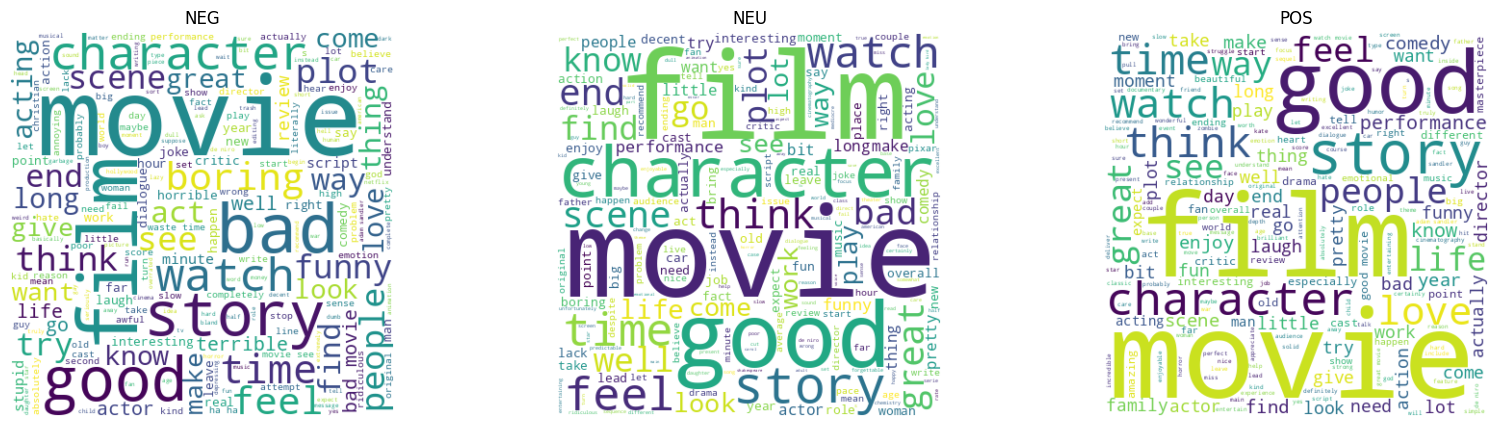

In [23]:
wordclouds(df_copy, 'sentiment', 50)

Podemos ver como en los wordcloud las palabras que m√°s se repiten naturalmente son "movie" y "film", cosa que tiene sentido. Por otro lado, podemos ver algunas palabras t√≠picas de cada conjunto como "bad", "boring" o "bad movie" en el conjunto negativo. En el conjunto neurtro podemos ver como los comentarios suelen reflejar sobre todo comentarios positivos, seguramente por como se estructuran los textos al querer dar una opini√≥n buena pero que al espectador le haya encantado el todo (verbos como feel, palabras que reflejan la fijaci√≥n en algo como "character", "scene" o "story" para destacar/pasar por alto solo una parte de todo lo que implica el filme... ). Por √∫ltimo, el grupo del grupo positivo tiene sobre todo verbos/adjetivos positivos, por lo que entendemos que el texto esta bien clasificado y podemos proseguir. 

Tambi√©n podemos ver las palabras que mas se repiten 

In [25]:
# Funci√≥n para obtener n-gramas
def get_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

# Funci√≥n para calcular y graficar bigramas y trigramas m√°s comunes por clases
def plot_most_common_ngrams_by_class(df, text_column, class_column):
    # Crear subgr√°ficos para bigramas
    num_classes = len(df[class_column].unique())
    ncols = 3  # N√∫mero de columnas de subgr√°ficos
    nrows = (num_classes + ncols - 1) // ncols  # Calcular n√∫mero de filas necesarias

    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

    # Generar bigramas
    for i, class_value in enumerate(df[class_column].unique()):

        # Aseg√∫rate de que cada entrada sea una lista de strings
        # Aseg√∫rate de que cada entrada sea una lista de strings
        df['tokens'] = df['tokens'].apply(lambda x: [t.text if hasattr(t, "text") else str(t) for t in x] if isinstance(x, list) else str(x).split())

        # Filtrar los datos por clase
        subset = df[df[class_column] == class_value]

        # Obtener todos los tokens del subset filtrado
        all_words = [word for tokens in subset[text_column] for word in tokens]

        # Calcular bigramas
        bigram_freq = Counter(get_ngrams(all_words, 2))

        # Obtener los 10 bigramas m√°s comunes
        bigram_most_common = bigram_freq.most_common(10)

        # Bigramas
        bigrams, bigram_counts = zip(*bigram_most_common)
        axes[i].barh(bigrams, bigram_counts, color='#a9dfd0', alpha=0.7)

        # Configuraci√≥n de los gr√°ficos
        axes[i].set_title(f'Bigramas m√°s comunes en {class_value}')
        axes[i].set_xlabel('Frecuencia')
        axes[i].set_ylabel('Bigramas')

    # Ajustar espacio entre subgr√°ficos y mostrar el plot de bigramas
    plt.tight_layout()
    plt.show()

    # Crear subgr√°ficos para trigramas
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

    # Generar trigramas
    for i, class_value in enumerate(df[class_column].unique()):
        # Filtrar los datos por clase
        subset = df[df[class_column] == class_value]

        # Obtener todos los tokens del subset filtrado
        all_words = [word for tokens in subset[text_column] for word in tokens]

        # Calcular trigramas
        trigram_freq = Counter(get_ngrams(all_words, 3))

        # Obtener los 10 trigramas m√°s comunes
        trigram_most_common = trigram_freq.most_common(10)

        # Trigramas
        trigrams, trigram_counts = zip(*trigram_most_common)
        axes[i].barh(trigrams, trigram_counts, color='#2C77A8', alpha=0.7)

        # Configuraci√≥n de los gr√°ficos
        axes[i].set_title(f'Trigramas m√°s comunes en {class_value}')
        axes[i].set_xlabel('Frecuencia')
        axes[i].set_ylabel('Trigramas')

    # Ajustar espacio entre subgr√°ficos y mostrar el plot de trigramas
    plt.tight_layout()
    plt.show()

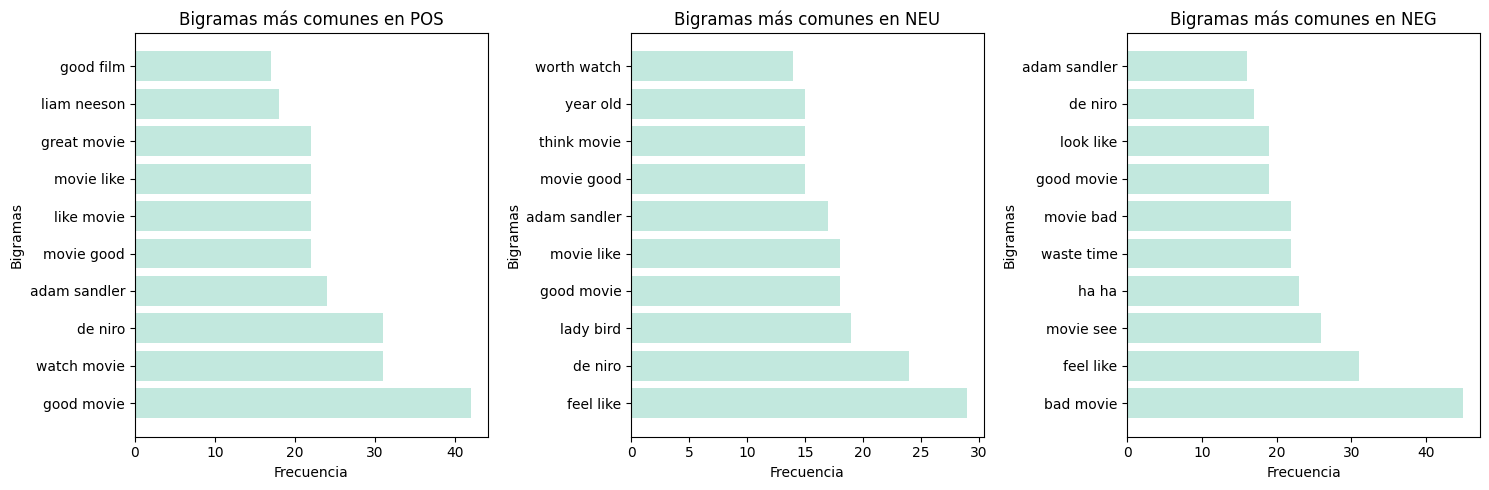

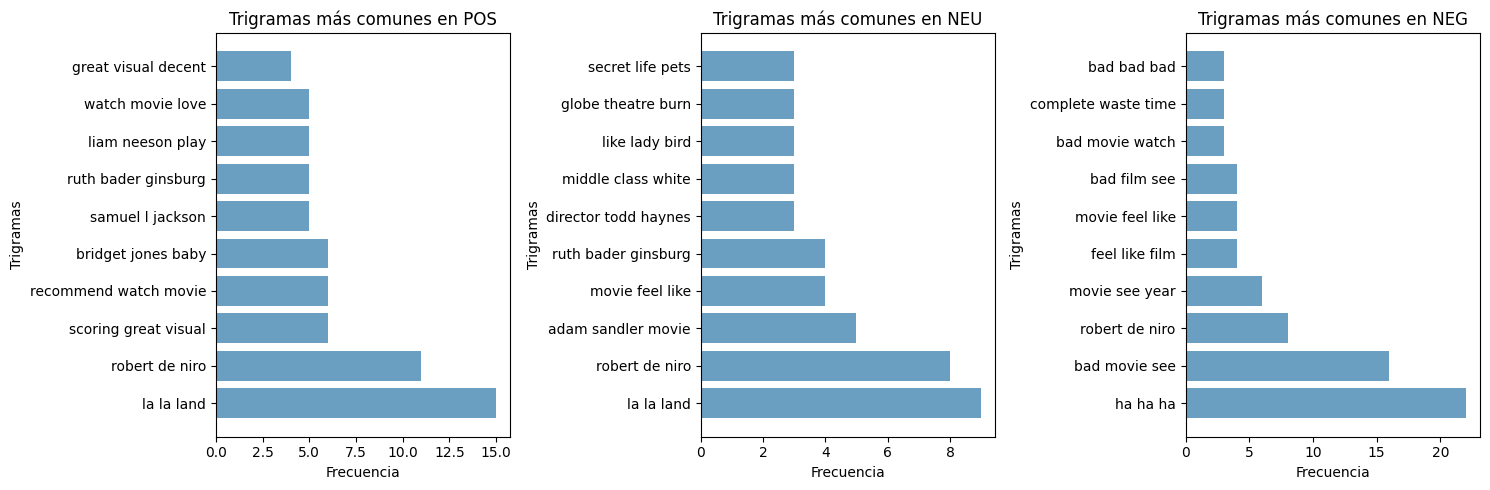

In [30]:
plot_most_common_ngrams_by_class(df, "tokens", "sentiment")

### Extracci√≥n de caracter√≠sticas 

In [ ]:
from sklearn.model_selection import train_test_split

# Separar para clasificaci√≥n de sentimiento
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Separar para predicci√≥n del score
X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(
    df['review'], df['score'].astype(int), test_size=0.2, random_state=42)

In [ ]:
df['sentiment']

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(df['review'])

print("N√∫mero total de palabras √∫nicas:", len(vectorizer.vocabulary_))

In [ ]:
# Ajustar vectorizador solo con los datos de entrenamiento
tfidf = TfidfVectorizer(max_features=3000)
X_train_sent_vec = tfidf.fit_transform(X_train_sent)
X_test_sent_vec = tfidf.transform(X_test_sent)

X_train_score_vec = tfidf.transform(X_train_score)
X_test_score_vec = tfidf.transform(X_test_score)

### Topic modelling

In [ ]:
from sklearn.decomposition import NMF
from scipy.sparse import hstack  # Para concatenar sparse matrices

# N√∫mero de temas
n_topics = 20

# Topic modeling con NMF (solo sobre datos de entrenamiento)
nmf = NMF(n_components=n_topics, random_state=42)
W_train_sent = nmf.fit_transform(X_train_sent_vec)  # Representaciones tem√°ticas del train
W_test_sent = nmf.transform(X_test_sent_vec)        # Proyecci√≥n del test sobre esos mismos temas

W_train_score = nmf.transform(X_train_score_vec)
W_test_score = nmf.transform(X_test_score_vec)

# Concatenar los vectores TF-IDF con las representaciones de t√≥picos (W matrices)
X_train_sent_topic = hstack([X_train_sent_vec, W_train_sent])
X_test_sent_topic = hstack([X_test_sent_vec, W_test_sent])

X_train_score_topic = hstack([X_train_score_vec, W_train_score])
X_test_score_topic = hstack([X_test_score_vec, W_test_score])

In [ ]:
# Acceder al vocabulario
feature_names = tfidf.get_feature_names_out()

# Funci√≥n para mostrar las top palabras por cada t√≥pico
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"üîπ Topic {topic_idx}: ", end='')
        top_features_idx = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_idx]
        print(", ".join(top_features))

# Mostrar los temas
display_topics(nmf, feature_names, no_top_words=10)

#### Embedding preentrenado

In [ ]:
glove_file_path = 'glove.twitter.27B.50d.txt'

# Crear un diccionario vac√≠o para almacenar los embeddings
glove_dict = {}

# Leer el archivo y cargar los embeddings en el diccionario
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        # Separar cada l√≠nea en la palabra y el vector
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

# Verificar que se ha cargado correctamente el diccionario
print(f"Se han cargado {len(glove_dict)} palabras en el diccionario de GloVe.")

In [ ]:
# Funci√≥n para convertir una rese√±a en un vector
def text_to_vector(text, glove_dict, dim=50):
    words = text.split()  # Dividir la rese√±a en palabras (suponiendo que ya est√°n limpias)
    
    # Obtener el vector de cada palabra si est√° en el diccionario de GloVe
    valid_vectors = [glove_dict[word] for word in words if word in glove_dict]
    
    # Si hay palabras v√°lidas, calcular la media de sus vectores
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        # Si no hay palabras v√°lidas, devolver un vector de ceros
        return np.zeros(dim)

# Aplicar la funci√≥n a cada rese√±a en el DataFrame
X_glove = np.vstack(df['review'].apply(lambda x: text_to_vector(x, glove_dict)))

# Verificar la forma de los vectores resultantes
print(X_glove.shape)

In [ ]:
# Para la tarea de clasificaci√≥n de sentimiento
X_train_glove_sent, X_test_glove_sent, y_train_sent, y_test_sent = train_test_split(
    X_glove, df['sentiment'], test_size=0.2, random_state=42)

# Para la tarea de predicci√≥n del score
X_train_glove_score, X_test_glove_score, y_train_score, y_test_score = train_test_split(
    X_glove, df['score'].astype(int), test_size=0.2, random_state=42)

## Modelos

### TF-IDF + LR

#### Clasificaci√≥n

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_sent_enc = le.fit_transform(y_train_sent)
y_test_sent_enc = le.transform(y_test_sent)

modelLR = LogisticRegression(solver='liblinear')
#Entrenamos el modelo con el conjunto de train
modelLR.fit(X_train_score_topic, y_train_sent_enc)
prediccion = modelLR.predict(X_test_score_topic)

print('Accuracy (exactitud): ', accuracy_score(y_test_sent_enc, prediccion))

### Embedding preentrenado + LR

In [ ]:
# Crear y entrenar el clasificador
modelLR = LogisticRegression(solver='liblinear')
modelLR.fit(X_train_glove_sent, y_train_sent_enc)

# Realizar predicciones
prediccion = modelLR.predict(X_test_glove_sent)

# Evaluar el modelo
accuracy = accuracy_score(y_test_sent_enc, prediccion)
print('Accuracy (exactitud): ', accuracy)